In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
from huggingface_hub import notebook_login
notebook_login()

In [6]:
!pip install imbalanced-learn
!pip install scikit-learn==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 94.6 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 97.7 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages t

In [7]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import RandomOverSampler

In [8]:
!pip install -q evaluate datasets accelerate
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fs

In [9]:
!pip install -q matplotlib

In [10]:
!pip install -q numpy

In [11]:
!pip install -q pillow==11.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 41.8 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.


In [12]:
!pip install -q torchvision

In [13]:
import warnings
warnings.filterwarnings("ignore")


In [14]:
import gc
import numpy as np
import pandas as pd
import itertools
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import RandomOverSampler
import evaluate
from datasets import Dataset, Image, ClassLabel
from transformers import (
    TrainingArguments,
    Trainer,
#....................................................................

#Retain this part if you are working on ViTForImageClassification.
    ViTImageProcessor,
    ViTForImageClassification,

#....................................................................

    DefaultDataCollator
)
from transformers import AutoModel, AutoProcessor
from transformers.image_utils import load_image

import torch
from torch.utils.data import DataLoader
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomRotation,
    RandomResizedCrop,
    RandomHorizontalFlip,
    RandomAdjustSharpness,
    Resize,
    ToTensor
)


2025-05-03 09:14:48.741157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746263689.037954      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746263689.120349      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
from PIL import Image as PILImage
from PIL import ImageFile
# Enable loading truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [16]:
from datasets import load_dataset
dataset = load_dataset("Soumyajit9979/animals-humans", split="train")

from pathlib import Path

file_names = []
labels = []

for example in dataset:
    file_path = str(example['image'])
    label = example['label']

    file_names.append(file_path)
    labels.append(label)

print(len(file_names), len(labels))


README.md:   0%|          | 0.00/2.45k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/350M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/365M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5468 [00:00<?, ? examples/s]

5468 5468


In [17]:
df = pd.DataFrame.from_dict({"image": file_names, "label": labels})
print(df.shape)

df.head()
df['label'].unique()

y = df[['label']]
df = df.drop(['label'], axis=1)
ros = RandomOverSampler(random_state=83)
df, y_resampled = ros.fit_resample(df, y)
del y
df['label'] = y_resampled
del y_resampled
gc.collect()


(5468, 2)


214

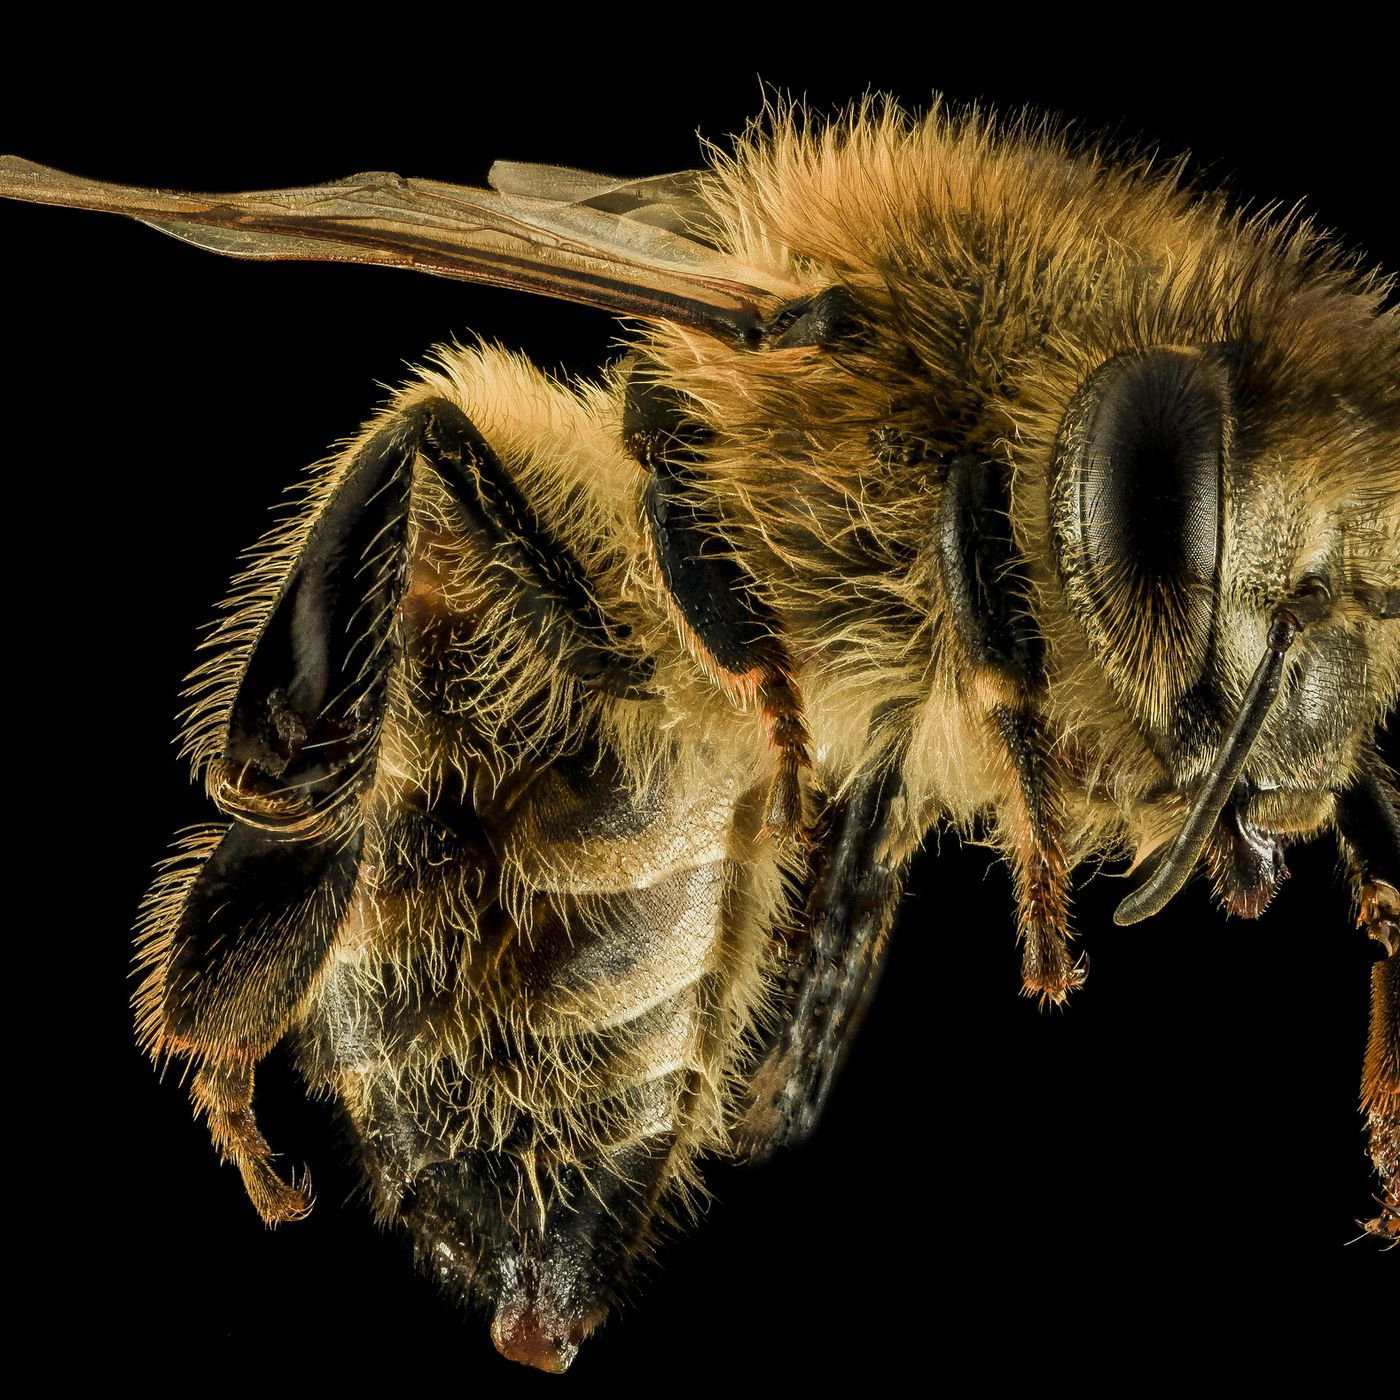

In [18]:
dataset[0]["image"]
dataset[297]["image"]


In [19]:
dataset[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1640x1025>,
 'label': 0}

In [20]:
labels_subset = labels[:5]
print(labels_subset)

labels_list = [
    "antelope", "badger", "bear", "bat", "bee", "beetle", "bison", "boar", "butterfly",
    "cat", "caterpillar", "chimpanzee", "cockroach", "cow", "coyote", "crab", "crow",
    "deer", "dog", "dolphin", "donkey", "dragonfly", "duck", "eagle", "elephant",
    "flamingo", "fly", "fox", "goat", "goldfish", "goose", "gorilla", "grasshopper",
    "hamster", "hare", "hedgehog", "hippopotamus", "hornbill", "horse","human", "hummingbird",
    "hyena", "jellyfish", "kangaroo", "koala", "ladybugs", "leopard", "lion", "lizard",
    "lobster", "mosquito", "moth", "mouse", "octopus", "okapi", "orangutan", "otter",
    "owl", "ox", "oyster", "panda", "parrot", "pelecaniformes", "penguin", "pig",
    "pigeon", "porcupine", "possum", "raccoon", "rat", "reindeer", "rhinoceros",
    "sandpiper", "seahorse", "seal", "shark", "sheep", "snake", "sparrow", "squid",
    "squirrel", "starfish", "swan", "tiger", "turkey", "turtle", "whale", "wolf",
    "wombat", "woodpecker", "zebra"
]
label2id = {label: i for i, label in enumerate(labels_list)}
id2label = {i: label for i, label in enumerate(labels_list)}
# Create a ClassLabel object
class_labels = ClassLabel(num_classes=len(labels_list), names=labels_list)

# Define the mapping function
def map_label2id(example):
    if isinstance(example['label'], str):
        example['label'] = class_labels.str2int(example['label'])
    return example


# Apply the mapping
dataset = dataset.map(map_label2id)

# Update the dataset's features to reflect the ClassLabel type
from datasets import Features, Value
features = dataset.features.copy()
features['label'] = class_labels
dataset = dataset.cast(features)


[0, 0, 0, 0, 0]


Map:   0%|          | 0/5468 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/5468 [00:00<?, ? examples/s]

In [21]:
dataset = dataset.train_test_split(test_size=0.4, shuffle=True, stratify_by_column="label")
train_data = dataset['train']
test_data = dataset['test']

In [22]:
from transformers import AutoImageProcessor
from transformers import SiglipForImageClassification

# Use AutoImageProcessor instead of AutoProcessor
model_str = "google/siglip2-base-patch16-224"
processor = AutoImageProcessor.from_pretrained(model_str)

# Extract preprocessing parameters
image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]


preprocessor_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [23]:
# Define training transformations
_train_transforms = Compose([
    Resize((size, size)),
    RandomRotation(90),
    RandomAdjustSharpness(2),
    ToTensor(),
    Normalize(mean=image_mean, std=image_std)
])

# Define validation transformations
_val_transforms = Compose([
    Resize((size, size)),
    ToTensor(),
    Normalize(mean=image_mean, std=image_std)
])


In [24]:
# Apply transformations to dataset
def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

# Assuming train_data and test_data are loaded datasets
train_data.set_transform(train_transforms)
test_data.set_transform(val_transforms)


In [25]:
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example['label'] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}


In [26]:
model = SiglipForImageClassification.from_pretrained(model_str, num_labels=len(labels_list))
model.config.id2label = id2label
model.config.label2id = label2id

print(model.num_parameters(only_trainable=True) / 1e6)


config.json:   0%|          | 0.00/253 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

Some weights of SiglipForImageClassification were not initialized from the model checkpoint at google/siglip2-base-patch16-224 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


92.954203


In [27]:
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions = eval_pred.predictions
    label_ids = eval_pred.label_ids

    predicted_labels = predictions.argmax(axis=1)
    acc_score = accuracy.compute(predictions=predicted_labels, references=label_ids)['accuracy']

    return {
        "accuracy": acc_score
    }


In [28]:
args = TrainingArguments(
    output_dir="siglip2-finetune",
    logging_dir='./logs',
    eval_strategy="epoch",
    learning_rate=2e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=8,
    num_train_epochs=30,
    weight_decay=0.02,
    warmup_steps=50,
    remove_unused_columns=False,
    save_strategy='epoch',
    load_best_model_at_end=True,
    save_total_limit=1,
    report_to="none"
)


In [29]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_data,
    eval_dataset=test_data,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
)


In [30]:
trainer.evaluate()

trainer.train()

trainer.evaluate()

outputs = trainer.predict(test_data)
print(outputs.metrics)


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,4.707646,0.015539
2,No log,4.207923,0.061243
3,No log,3.584473,0.207038
4,No log,2.928411,0.383455
5,No log,2.355873,0.546161
6,No log,1.925985,0.667733
7,No log,1.553706,0.741773
8,No log,1.314778,0.788391
9,No log,1.098313,0.822212
10,2.597100,0.955314,0.839122


{'test_loss': 0.36999446153640747, 'test_accuracy': 0.9296160877513712, 'test_runtime': 38.4765, 'test_samples_per_second': 56.866, 'test_steps_per_second': 3.561}


Accuracy: 0.9296
F1 Score: 0.9291


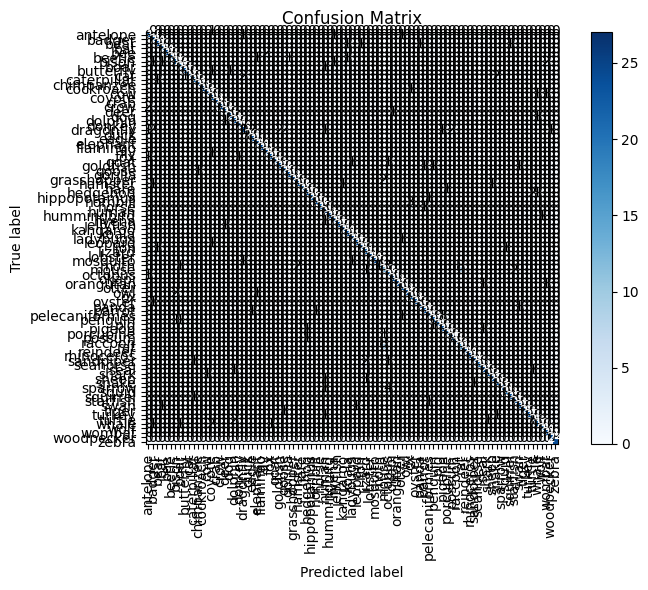


Classification report:

                precision    recall  f1-score   support

      antelope     0.8214    0.9583    0.8846        24
        badger     0.7778    0.8750    0.8235        24
          bear     0.9231    1.0000    0.9600        24
           bat     0.9091    0.8333    0.8696        24
           bee     1.0000    1.0000    1.0000        24
        beetle     1.0000    0.9167    0.9565        24
         bison     0.8400    0.8750    0.8571        24
          boar     0.8571    0.7500    0.8000        24
     butterfly     0.9583    0.9583    0.9583        24
           cat     1.0000    0.9167    0.9565        24
   caterpillar     0.9048    0.7917    0.8444        24
    chimpanzee     0.9583    0.9583    0.9583        24
     cockroach     1.0000    1.0000    1.0000        24
           cow     0.9583    0.9583    0.9583        24
        coyote     0.7857    0.9167    0.8462        24
          crab     1.0000    1.0000    1.0000        24
          crow     1.0

In [31]:
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues, figsize=(10, 8)):

    plt.figure(figsize=figsize)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.0f'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

if len(labels_list) <= 150:
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, labels_list, figsize=(8, 6))

print()
print("Classification report:")
print()
print(classification_report(y_true, y_pred, target_names=labels_list, digits=4))


In [32]:
trainer.save_model()

from huggingface_hub import HfApi

api = HfApi()
repo_id = f"Soumyajit9979/siglip-finetuned-animal-human"

try:
    api.create_repo(repo_id)
    print(f"Repo {repo_id} created")

except:

    print(f"Repo {repo_id} already exists")

api.upload_folder(
    folder_path="siglip2-finetune/",
    path_in_repo=".",
    repo_id=repo_id,
    repo_type="model",
    revision="main"
)


Repo Soumyajit9979/siglip-finetuned-animal-human already exists


Upload 7 LFS files:   0%|          | 0/7 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/372M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/744M [00:00<?, ?B/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/372M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Soumyajit9979/siglip-finetuned-animal-human/commit/f24183d9ca6edf0fd543b73dcbecb939bb89f109', commit_message='Upload folder using huggingface_hub', commit_description='', oid='f24183d9ca6edf0fd543b73dcbecb939bb89f109', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Soumyajit9979/siglip-finetuned-animal-human', endpoint='https://huggingface.co', repo_type='model', repo_id='Soumyajit9979/siglip-finetuned-animal-human'), pr_revision=None, pr_num=None)